In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv("covid_19_clean_complete.csv")

In [12]:
df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [14]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=['Date'])
df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [18]:
# rename the columns
df.rename(columns={'Date':'date',
                   'Province/State':'state',
                   'Country/Region':'country',
                   'Lat':'lat',
                   'Long':'long',
                   'Confirmed':'confirmed',
                   'Deaths':'death',
                   'Recovered':'recovered',
                   'Active':'active'},inplace=True)

In [19]:
df.head(2)

,state,country,lat,long,date,confirmed,death,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


In [20]:
df['WHO Region'].value_counts()

WHO Region
Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
Name: count, dtype: int64

In [21]:
df.head()

,state,country,lat,long,date,confirmed,death,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [22]:
df.tail()

,state,country,lat,long,date,confirmed,death,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [23]:
# max()
top=df[df['date']==df['date'].max()]

In [24]:
top

,state,country,lat,long,date,confirmed,death,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [26]:
top['date'].value_counts()

date
2020-07-27    261
Name: count, dtype: int64

In [28]:
# perform groupby on country --> extract confirmed, death anf recover ---> world
world=top.groupby('country')[['confirmed','death','recovered','active']].sum().reset_index()
world

,country,confirmed,death,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [41]:
figure=px.choropleth(world,locations='country',locationmode='country names',
                     color='recovered',
                     range_color=[1,2000],
                     color_continuous_scale='greens',
                     title='countries with active cases')
figure.show()

In [32]:
# group by dates --> confirmed --> 2 minutes ---> 50

In [45]:
total_cases=df.groupby('date')[['confirmed']].sum().reset_index()

In [46]:
total_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [52]:
total_cases=total_cases.head(50)

<Axes: title={'center': 'worldwide confirmed cases'}, xlabel='date', ylabel='confirmed'>

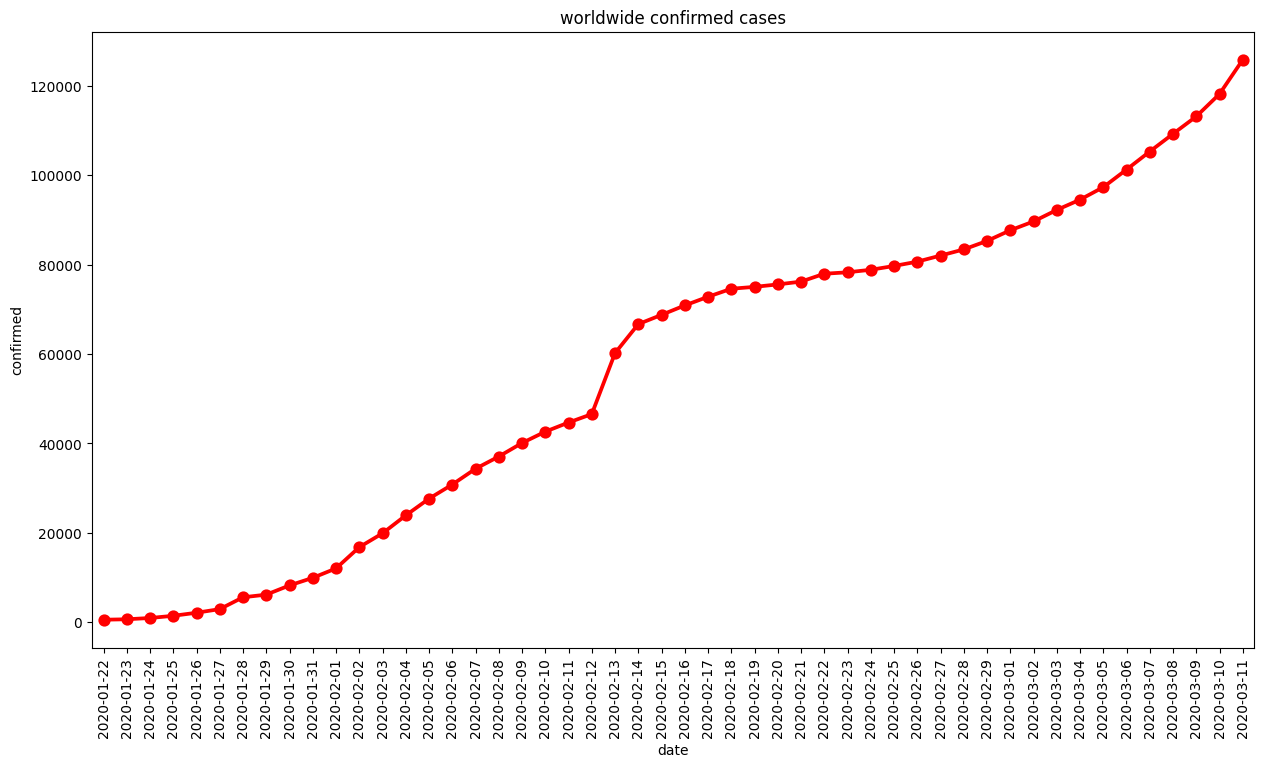

In [54]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=10)
plt.title("worldwide confirmed cases")
sns.pointplot(x=total_cases.date,y=total_cases.confirmed,color='red')

<Axes: xlabel='week', ylabel='confirmed'>

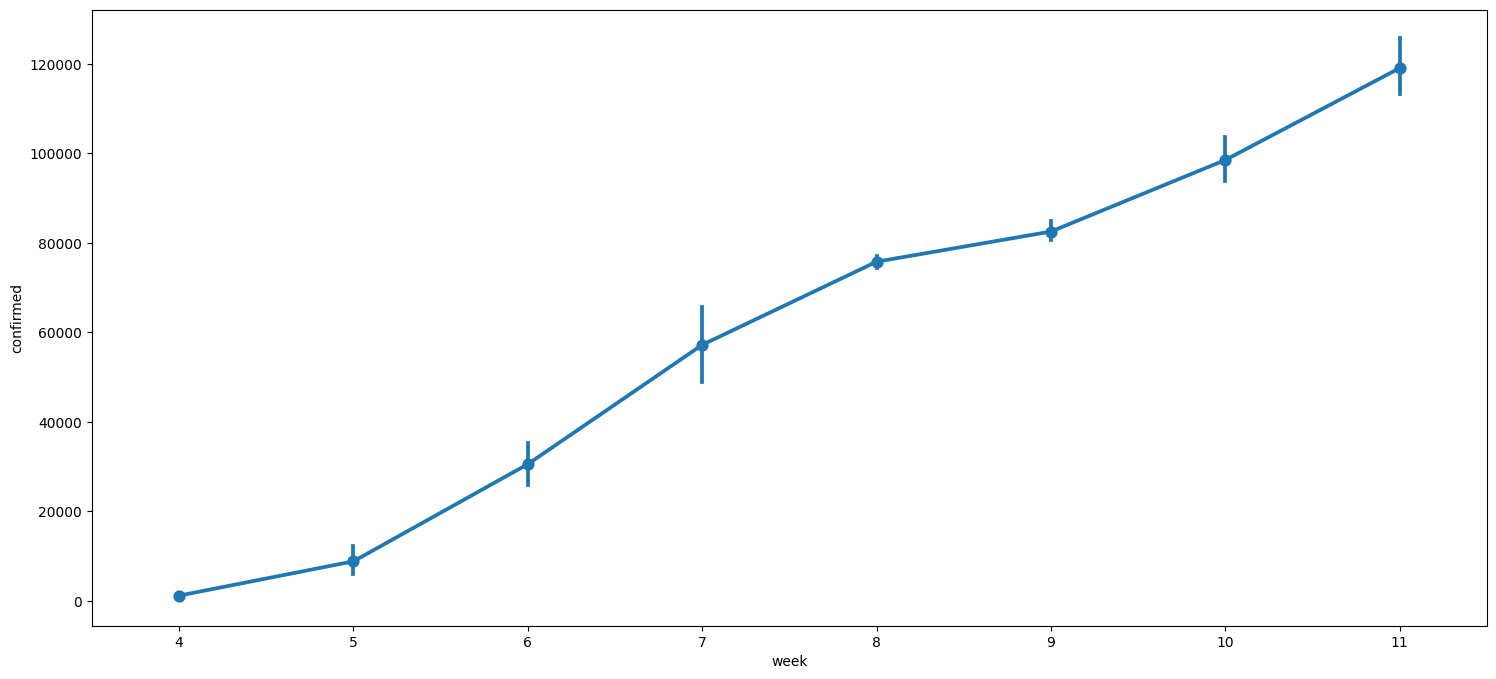

In [65]:
plt.figure(figsize=(18,8))
sns.pointplot(x= total_cases['date'].dt.isocalendar().week ,y=total_cases['confirmed'])


In [67]:
df.groupby(df.date.dt.month)['confirmed'].sum()


date
1        38534
2      1663437
3      9002815
4     63391662
5    144990399
6    246525787
7    362895848
Name: confirmed, dtype: int64

In [61]:
top_active=top.groupby(by='country')['active'].sum().sort_values(ascending=False).reset_index().head(20)

In [62]:
top_active

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


<Axes: xlabel='active', ylabel='country'>

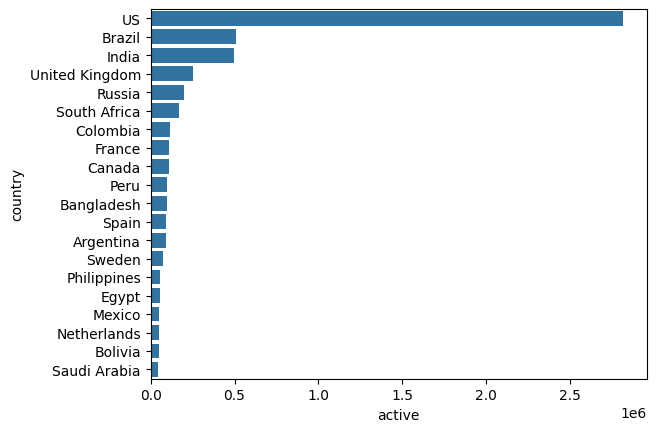

In [63]:
sns.barplot(x=top_active.active,y=top_active.country)

In [68]:
china=df[df.country=='China']

In [69]:
china.head()

,state,country,lat,long,date,confirmed,death,recovered,active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [77]:
china=china.groupby(by='date')[['recovered','death','confirmed','active']].sum().reset_index().head(50)

In [71]:
china.head()

,date,recovered,death,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970


In [75]:
india=df[df.country=='India']
india=india.groupby(by='date')[['recovered','death','confirmed','active']].sum().reset_index().head(50)

In [76]:
italy=df[df.country=='Italy']
italy=italy.groupby(by='date')[['recovered','death','confirmed','active']].sum().reset_index().head(50)

<Axes: xlabel='date', ylabel='confirmed'>

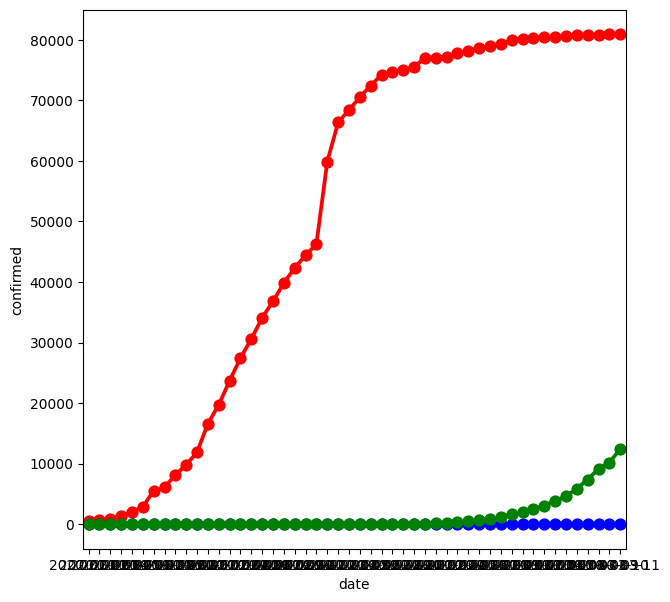

In [78]:
plt.figure(figsize=(7,7))
sns.pointplot(x=china.date,y=china.confirmed,color='red')
sns.pointplot(x=india.date,y=india.confirmed,color='blue')
sns.pointplot(x=italy.date,y=italy.confirmed,color='green')

In [79]:
p_india=pd.read_excel("per_day_cases.xlsx",parse_dates=True)

In [81]:
p_india. head()
# build a bar plot for new cases using plotly

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases
0,2020-01-30,1,1,1,0,0,NaN
1,2020-01-31,1,0,1,0,0,NaN
2,2020-02-01,1,0,1,0,0,NaN
3,2020-02-02,2,1,2,0,0,NaN
4,2020-02-03,3,1,3,0,0,NaN


In [85]:
import plotly

In [87]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=p_india['Date'],y=p_india['Total Cases'],mode='lines+markers',name='total cases'))
fig.show()

In [91]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=p_india['Date'],y=p_india['Total Cases'],mode='lines+markers',name='total cases'))
fig.update_layout(title_text='trend',plot_bgcolor='rgb(60,100,100)')
fig.show()

In [94]:
fig=px.bar(p_india,x='Date',y='New Cases')
fig.show()

In [ ]:
1.there is rise in no. of active cases from 0 to 12000  from jan to july
2. US has highest active cases of 281644
3. China has hihest confirmed cases of 80,000
4. in India total cases rose from 0 in Feb to 400 k in March
5. highest cases in INdia was on 21st